In [11]:
import torch
import imageio
import numpy as np
import matplotlib
from torchvision.utils import make_grid, save_image
from torch.utils.data import DataLoader
from matplotlib import pyplot as plt

from hyperparameters import *
from models import Generator, Discriminator
from utils import get_transforms, get_dataset
from Learner import Learner

matplotlib.style.use('ggplot')

In [12]:
device

device(type='cuda')

In [13]:
transforms = get_transforms()
transform = transforms['transform']

In [14]:
dataset = get_dataset(transform)
train_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

In [15]:
next(iter(train_loader))[0].shape

torch.Size([512, 1, 28, 28])

In [16]:
generator = Generator(nz)
discriminator = Discriminator()

In [17]:
generator

Generator(
  (main): Sequential(
    (0): Linear(in_features=128, out_features=256, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Linear(in_features=256, out_features=512, bias=True)
    (3): LeakyReLU(negative_slope=0.2)
    (4): Linear(in_features=512, out_features=1024, bias=True)
    (5): LeakyReLU(negative_slope=0.2)
    (6): Linear(in_features=1024, out_features=784, bias=True)
    (7): Tanh()
  )
)

In [18]:
discriminator

Discriminator(
  (main): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
    (1): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): LeakyReLU(negative_slope=0.2)
    (4): Dropout(p=0.3, inplace=False)
    (5): Conv2d(64, 32, kernel_size=(3, 3), stride=(1, 1))
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): LeakyReLU(negative_slope=0.2)
    (8): Flatten(start_dim=1, end_dim=-1)
    (9): Dropout(p=0.3, inplace=False)
    (10): Linear(in_features=800, out_features=1, bias=True)
    (11): Sigmoid()
  )
)

In [19]:
learner = Learner(generator, discriminator,
                 train_loader, transforms)

In [20]:
learner.train_models(10)

118it [00:44,  2.68it/s]


Epoch 1 of 10
Generator loss: 1.32765869, Discriminator loss: 0.87364490


118it [00:44,  2.65it/s]


Epoch 2 of 10
Generator loss: 1.94279414, Discriminator loss: 1.00932346


118it [00:44,  2.67it/s]


Epoch 3 of 10
Generator loss: 2.99438118, Discriminator loss: 0.20557219


118it [00:43,  2.70it/s]


Epoch 4 of 10
Generator loss: 3.27935420, Discriminator loss: 0.31321433


118it [00:44,  2.65it/s]


Epoch 5 of 10
Generator loss: 3.11902839, Discriminator loss: 0.64229536


118it [00:44,  2.64it/s]


Epoch 6 of 10
Generator loss: 4.37180389, Discriminator loss: 0.07122893


118it [00:44,  2.67it/s]


Epoch 7 of 10
Generator loss: 3.81256318, Discriminator loss: 0.68407572


118it [00:45,  2.60it/s]


Epoch 8 of 10
Generator loss: 2.14106252, Discriminator loss: 0.46069611


118it [00:45,  2.60it/s]


Epoch 9 of 10
Generator loss: 2.58439171, Discriminator loss: 0.57074214


118it [00:43,  2.70it/s]

Epoch 10 of 10
Generator loss: 2.08283519, Discriminator loss: 0.75851657
DONE TRAINING


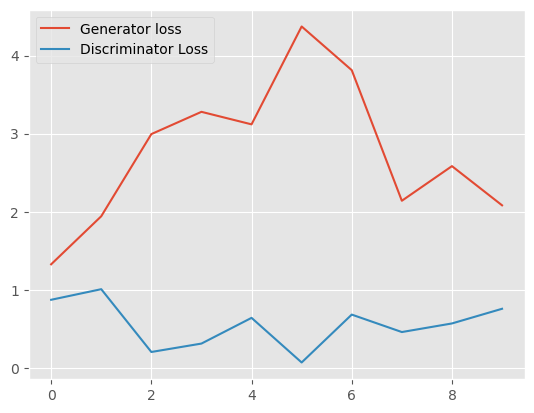

In [21]:
learner.save_results()
learner.plot_learning()